In [5]:
! explorer .

## dummy SUAVE Vehicle( only Fuselage)

In [1]:
import SUAVE
from SUAVE.Core import Units, Data
import vsp
import numpy as np
from SUAVE import func_tanuki

vehicle = SUAVE.Vehicle()
vehicle.tag = 'test'    

# ------------------------------------------------------------------
#  Fuselage
# ------------------------------------------------------------------

fuselage = SUAVE.Components.Fuselages.Fuselage()
fuselage.tag = 'fuselage'

fuselage.number_coach_seats    = vehicle.passengers
fuselage.seats_abreast         = 6
fuselage.seat_pitch            = 1     * Units.meter
fuselage.fineness.nose         = 1.6
fuselage.fineness.tail         = 2.
fuselage.lengths.nose          = 6.4   * Units.meter
fuselage.lengths.tail          = 8.0   * Units.meter
fuselage.lengths.cabin         = 28.85 * Units.meter
fuselage.lengths.total         = 38.02 * Units.meter
fuselage.lengths.fore_space    = 6.    * Units.meter
fuselage.lengths.aft_space     = 5.    * Units.meter
fuselage.width                 = 3.74  * Units.meter
fuselage.heights.maximum       = 3.74  * Units.meter
fuselage.effective_diameter    = 3.74     * Units.meter
fuselage.areas.side_projected  = 142.1948 * Units['meters**2'] 
fuselage.areas.wetted          = 446.718  * Units['meters**2'] 
fuselage.areas.front_projected = 12.57    * Units['meters**2'] 
fuselage.differential_pressure = 5.0e4 * Units.pascal # Maximum differential pressure

fuselage.heights.at_quarter_length          = 3.74 * Units.meter
fuselage.heights.at_three_quarters_length   = 3.65 * Units.meter
fuselage.heights.at_wing_root_quarter_chord = 3.74 * Units.meter

# add to vehicle
vehicle.append_component(fuselage)


### ポイント作成

In [2]:
"""Test the OpenVSP Python Interface."""
%matplotlib inline
from __future__ import print_function

import vsp as vsp
import numpy as np
import pandas as pd

def angle_between(refvec):#角度を計算
    origin=[0,0]
    ang1 = np.arctan2(*origin[::-1])
    ang2 = np.arctan2(*refvec[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

def create_point_random(start_and_end_point):#ランダムでポイントを作成
    point = np.random.randn(5,2)
    point = np.insert(point,0,start_and_end_point,axis=0)
    pnt=point.tolist()
    pnt = sorted(pnt, key=angle_between)
    pnt.append(start_and_end_point)
    return pnt

stdout = vsp.cvar.cstdout
errorMgr = vsp.ErrorMgrSingleton_getInstance()

In [3]:
mydict ={}
Xsec_STA = [5,10,15,20,25,30,35]
for i in Xsec_STA:
    mydict[i] = func_tanuki.create_point_random(1,4)
fuselage.Sections.Xsec=mydict
mydict

{5: [[1.0, 0.0],
  [-0.5403073392422845, -1.7900868931735345],
  [-2.2433142273981086, 0.6900406351950944],
  [-0.42330727856512684, 0.41055403915786937],
  [-0.02713510804924208, 0.4245144810753807],
  [1, 0]],
 10: [[1.0, 0.0],
  [-2.3716948529404784, -0.2922514957008591],
  [-2.3288158417837894, 0.8877142947226602],
  [1.184089750584397, 0.9482502003963316],
  [0.0684827332469416, 0.050050918348624115],
  [1, 0]],
 15: [[1.0, 0.0],
  [0.17473681828402948, -0.8463228887733507],
  [-1.2868758943108107, 1.3079286265011265],
  [0.5947386911687947, 0.637625847800252],
  [1.5469387334401656, 0.2406182968253368],
  [1, 0]],
 20: [[1.0, 0.0],
  [-1.4958834204626354, -0.6947885634381171],
  [-2.27216109635343, 0.7372168453618718],
  [0.5913112071944594, 0.6833230911648379],
  [2.367352331197621, 1.1865745437146091],
  [1, 0]],
 25: [[1.0, 0.0],
  [1.9511606505248515, -1.7739198379630061],
  [-0.23884405742738515, 0.6696043965350489],
  [0.9098046848685901, 2.903598350743495],
  [0.9764476749

In [46]:
a=mydict.items()

In [51]:
a[0][0]

35

In [52]:
a[0][1]

[[1.0, 0.0],
 [0.613456642915572, -0.6981518808724081],
 [-0.6250165226663039, 0.06705658973549597],
 [-1.7022343380043483, 0.5405420435390803],
 [0.38720276780933455, 0.6681002888544268],
 [1, 0]]

## SUAVE vsp write(only Fuselage)

In [4]:
# -------------
# Fuselage
# -------------    

fuselage = vehicle.fuselages.fuselage
width    = fuselage.width
length   = fuselage.lengths.total
hmax     = fuselage.heights.maximum
height1  = fuselage.heights.at_quarter_length
height2  = fuselage.heights.at_wing_root_quarter_chord 
height3  = fuselage.heights.at_three_quarters_length
effdia   = fuselage.effective_diameter
n_fine   = fuselage.fineness.nose 
t_fine   = fuselage.fineness.tail  
# w_ac     = wing.aerodynamic_center

# w_origin = vehicle.wings.main_wing.origin
# w_c_4    = vehicle.wings.main_wing.chords.root/4.

In [34]:
def create_sec(taisho_Xsec,X_sec_XLocation):
    #set location
    Xsec = "XSec_" + str(taisho_Xsec)
    Xsec = ""
    vsp.SetParmVal(fuse_id,"XLocPercent","XSec_1",2)

    # get surface id and change section type
    xsurf_id = vsp.GetXSecSurf(fuse_id, taisho_Xsec)
    vsp.ChangeXSecShape(xsurf_id, taisho_Xsec, vsp.XS_FILE_FUSE)

    # get xsec id and set point
    file_xsec_id = vsp.GetXSec(xsurf_id, taisho_Xsec)
    # Build Point Vec
    pnt = create_point_random([1,0])
    pnt_vec = vsp.Vec3dVec()
    for vec in pnt:
        pnt_vec.push_back(vsp.vec3d(vec[0], vec[1], 0.0)) 

    # Load Points Into XSec
    vsp.SetXSecPnts(file_xsec_id, pnt_vec)

    df = pd.DataFrame(pnt)
    df.plot(kind='scatter', x=0, y=1)

In [35]:
Xsec

NameError: name 'Xsec' is not defined

In [36]:
# Figure out the location x location of each section, 3 sections, end of nose, wing origin, and start of tail

x1 = n_fine*width/length
# x2 = (w_origin[0]+w_c_4)/length
# x3 = 1-t_fine*width/length

x2 = 2
x3 = 3

fuse_id = vsp.AddGeom("FUSELAGE") 
vsp.SetGeomName(fuse_id, fuselage.tag)
# area_tags[fuselage.tag] = ['fuselages',fuselage.tag]

tail_z_pos = 0.02 # default value

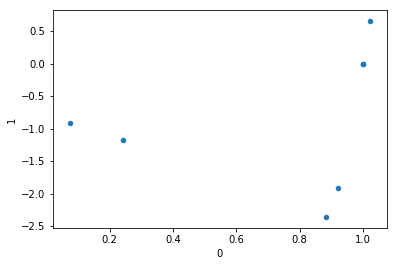

In [37]:
if fuselage.has_key('OpenVSP_values'):
    vals = fuselage.OpenVSP_values

    # for wave drag testing
    fuselage.OpenVSP_ID = fuse_id

    # Nose
    vsp.SetParmVal(fuse_id,"TopLAngle","XSec_0",vals.nose.top.angle)
    vsp.SetParmVal(fuse_id,"TopLStrength","XSec_0",vals.nose.top.strength)
    vsp.SetParmVal(fuse_id,"RightLAngle","XSec_0",vals.nose.side.angle)
    vsp.SetParmVal(fuse_id,"RightLStrength","XSec_0",vals.nose.side.strength)
    vsp.SetParmVal(fuse_id,"TBSym","XSec_0",vals.nose.TB_Sym)
    vsp.SetParmVal(fuse_id,"ZLocPercent","XSec_0",vals.nose.z_pos)


    # Tail
    vsp.SetParmVal(fuse_id,"TopLAngle","XSec_4",vals.tail.top.angle)
    vsp.SetParmVal(fuse_id,"TopLStrength","XSec_4",vals.tail.top.strength)
    # Below can be enabled if AllSym (below) is removed
    #vsp.SetParmVal(fuse_id,"RightLAngle","XSec_4",vals.tail.side.angle)
    #vsp.SetParmVal(fuse_id,"RightLStrength","XSec_4",vals.tail.side.strength)
    #vsp.SetParmVal(fuse_id,"TBSym","XSec_4",vals.tail.TB_Sym)
    #vsp.SetParmVal(fuse_id,"BottomLAngle","XSec_4",vals.tail.bottom.angle)
    #vsp.SetParmVal(fuse_id,"BottomLStrength","XSec_4",vals.tail.bottom.strength)
    if vals.tail.has_key('z_pos'):
        tail_z_pos = vals.tail.z_pos
    else:
        pass # use above default

    vsp.SetParmVal(fuse_id,"AllSym","XSec_4",1)

vsp.SetParmVal(fuse_id,"Length","Design",length)
vsp.SetParmVal(fuse_id,"Diameter","Design",width)
# vsp.SetParmVal(fuse_id,"XLocPercent","XSec_1",x1)
create_sec(1,2)
vsp.SetParmVal(fuse_id,"XLocPercent","XSec_2",x2)
vsp.SetParmVal(fuse_id,"XLocPercent","XSec_3",x3)
vsp.SetParmVal(fuse_id,"ZLocPercent","XSec_4",tail_z_pos)
vsp.SetParmVal(fuse_id, "Ellipse_Width", "XSecCurve_1", width)
vsp.SetParmVal(fuse_id, "Ellipse_Width", "XSecCurve_2", width)
vsp.SetParmVal(fuse_id, "Ellipse_Width", "XSecCurve_3", width)
vsp.SetParmVal(fuse_id, "Ellipse_Height", "XSecCurve_1", height1);
vsp.SetParmVal(fuse_id, "Ellipse_Height", "XSecCurve_2", height2);
vsp.SetParmVal(fuse_id, "Ellipse_Height", "XSecCurve_3", height3);   

# Write the vehicle to the file

vsp.WriteVSPFile(fuselage.tag + ".vsp3")

In [33]:
! explorer .